In [2]:
from pydub import AudioSegment
import pandas as pd
import numpy as np

C:\Users\Hyde\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
wav_file = AudioSegment.from_file(file='data/sound_rec.wav')

In [11]:
Events_odd = pd.read_csv('C:/Users/Hyde/Projects/KYLab/Marmoset 2/Oddball/sound_oddb_only_tirg.csv',  header=None)
print(Events_odd)
Events_odd[0] = Events_odd[0]*1000
latency = Events_odd[0].values.astype(int)
print(latency)

           0  1       2
0     508.78  1    0.00
1     509.28  1    0.50
2     509.78  1    1.00
3     510.29  1    1.51
4     510.79  1    2.01
..       ... ..     ...
995  1009.30  1  500.52
996  1009.80  1  501.02
997  1010.30  1  501.52
998  1010.80  2  502.02
999  1011.30  1  502.52

[1000 rows x 3 columns]
[ 508780  509280  509780  510290  510790  511290  511790  512299  512799
  513299  513809  514309  514809  515320  515820  516320  516820  517330
  517830  518330  518840  519340  519840  520350  520850  521350  521850
  522360  522860  523360  523870  524370  524870  525380  525880  526380
  526880  527390  527890  528390  528900  529400  529900  530400  530910
  531410  531910  532420  532920  533420  533930  534430  534930  535430
  535940  536440  536940  537450  537950  538450  538960  539460  539960
  540470  540970  541470  541970  542480  542980  543480  543990  544490
  544990  545500  546000  546500  547000  547510  548010  548510  549020
  549520  550020  550520  5510

In [12]:
wav_slice = []
for i in latency:
    wav_slice.append(wav_file[i+7:i+60])

In [13]:
print(wav_slice[0])

In [14]:
wav_slice[0].export('wav_0.wav', format='wav')

<_io.BufferedRandom name='wav_0.wav'>

In [16]:
file = 'data/wavs60_odd/'
for ii in range(1000):
    wav_slice[ii].export(file+'wav60_'+str(ii)+'.wav', format='wav')

In [17]:
types = Events_odd[1].values.astype(int)
# print(types)
wav_slice_t0 = []
wav_slice_t1 = []

for iii in range(0,1000):
    if types[iii] == 1:
        wav_slice_t0.append(wav_slice[iii])
    elif types[iii] == 2:
        wav_slice_t1.append(wav_slice[iii])

In [19]:
print(len(wav_slice_t1))

100


In [20]:
wav_slice_obt = wav_slice_t0+wav_slice_t1

In [21]:
file_1 = 'data/wavs60_odd_obt/'
for iiiii in range(1000):
    wav_slice_obt[iiiii].export(file_1+'wav60_'+str(iiiii)+'.wav', format='wav')

In [3]:
import librosa

In [44]:
example_audio_file = 'data/wavs60_odd_obt/wav60_900.wav'
# y_test, sr_test = librosa.load(librosa.util.example_audio_file())
# spec_bw = librosa.feature.spectral_bandwidth(y=y_test, sr=sr_test)
# cent = librosa.feature.spectral_centroid(y=y_test, sr=sr_test)
# rolloff = librosa.feature.spectral_rolloff(y=y_test, sr=sr_test, roll_percent=0.9)


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

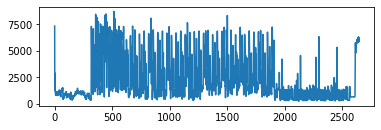

In [54]:
fig=plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(rolloff[0])

In [45]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


file = example_audio_file
# load the file
y, sr = librosa.load(file)
# short time fourier transform
# (n_fft and hop length determine frequency/time resolution)
n_fft = 2048
S = librosa.stft(y, n_fft=n_fft, hop_length=n_fft//2)
# convert to db
# (for your CNN you might want to skip this and rather ensure zero mean and unit variance)
D = librosa.amplitude_to_db(np.abs(S), ref=np.max)
# average over file
D_AVG = np.mean(D, axis=1)

# plt.bar(np.arange(D_AVG.shape[0]), D_AVG)
# x_ticks_positions = [n for n in range(0, n_fft // 2, n_fft // 16)]
# x_ticks_labels = [str(sr / 1024 * n) + 'Hz' for n in x_ticks_positions]
# plt.xticks(x_ticks_positions, x_ticks_labels)
# plt.xlabel('Frequency')
# plt.ylabel('dB')
# plt.show()

# np.max(D_AVG)
n = np.where(D_AVG == np.max(D_AVG))
print(n[0][0])
fq = sr / 2048 * n[0][0]

round(fq/10)*10

111


1200.0

In [10]:
# filename = librosa.util.example_audio_file()

y, sr = librosa.load(librosa.util.example_audio_file())
n_fft = 1024
hop_length = 512

spec = np.abs(librosa.core.stft(y, n_fft=n_fft, hop_length=hop_length))
freqs = librosa.core.fft_frequencies(n_fft=n_fft)
times = librosa.core.frames_to_time(spec[0], sr=sr, n_fft=n_fft, hop_length=hop_length)

print('spectrogram size', spec.shape)

fft_bin = 6
time_idx = 1000

print('freq (Hz)', freqs[fft_bin])
print('time (s)', times[time_idx])
print('amplitude', spec[fft_bin, time_idx])

spectrogram size (513, 2647)
freq (Hz) 129.19921875
time (s) 0.02820861678004535
amplitude 4.3650975
